In [1]:
import pandas as pd
data = pd.read_csv('student_sleep_patterns_EDA_ready.csv',index_col='Student_ID')

In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (400, 29)
Testing set shape: (100, 29)


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 250 to 103
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           400 non-null    int64  
 1   Gender                        400 non-null    object 
 2   University_Year               400 non-null    object 
 3   Sleep_Duration                400 non-null    float64
 4   Study_Hours                   400 non-null    float64
 5   Screen_Time                   400 non-null    float64
 6   Caffeine_Intake               400 non-null    int64  
 7   Physical_Activity             400 non-null    int64  
 8   Sleep_Quality                 400 non-null    int64  
 9   Weekday_Sleep_Start           400 non-null    float64
 10  Weekend_Sleep_Start           400 non-null    float64
 11  Weekday_Sleep_End             400 non-null    float64
 12  Weekend_Sleep_End             400 non-null    float64
 13  Weekday_

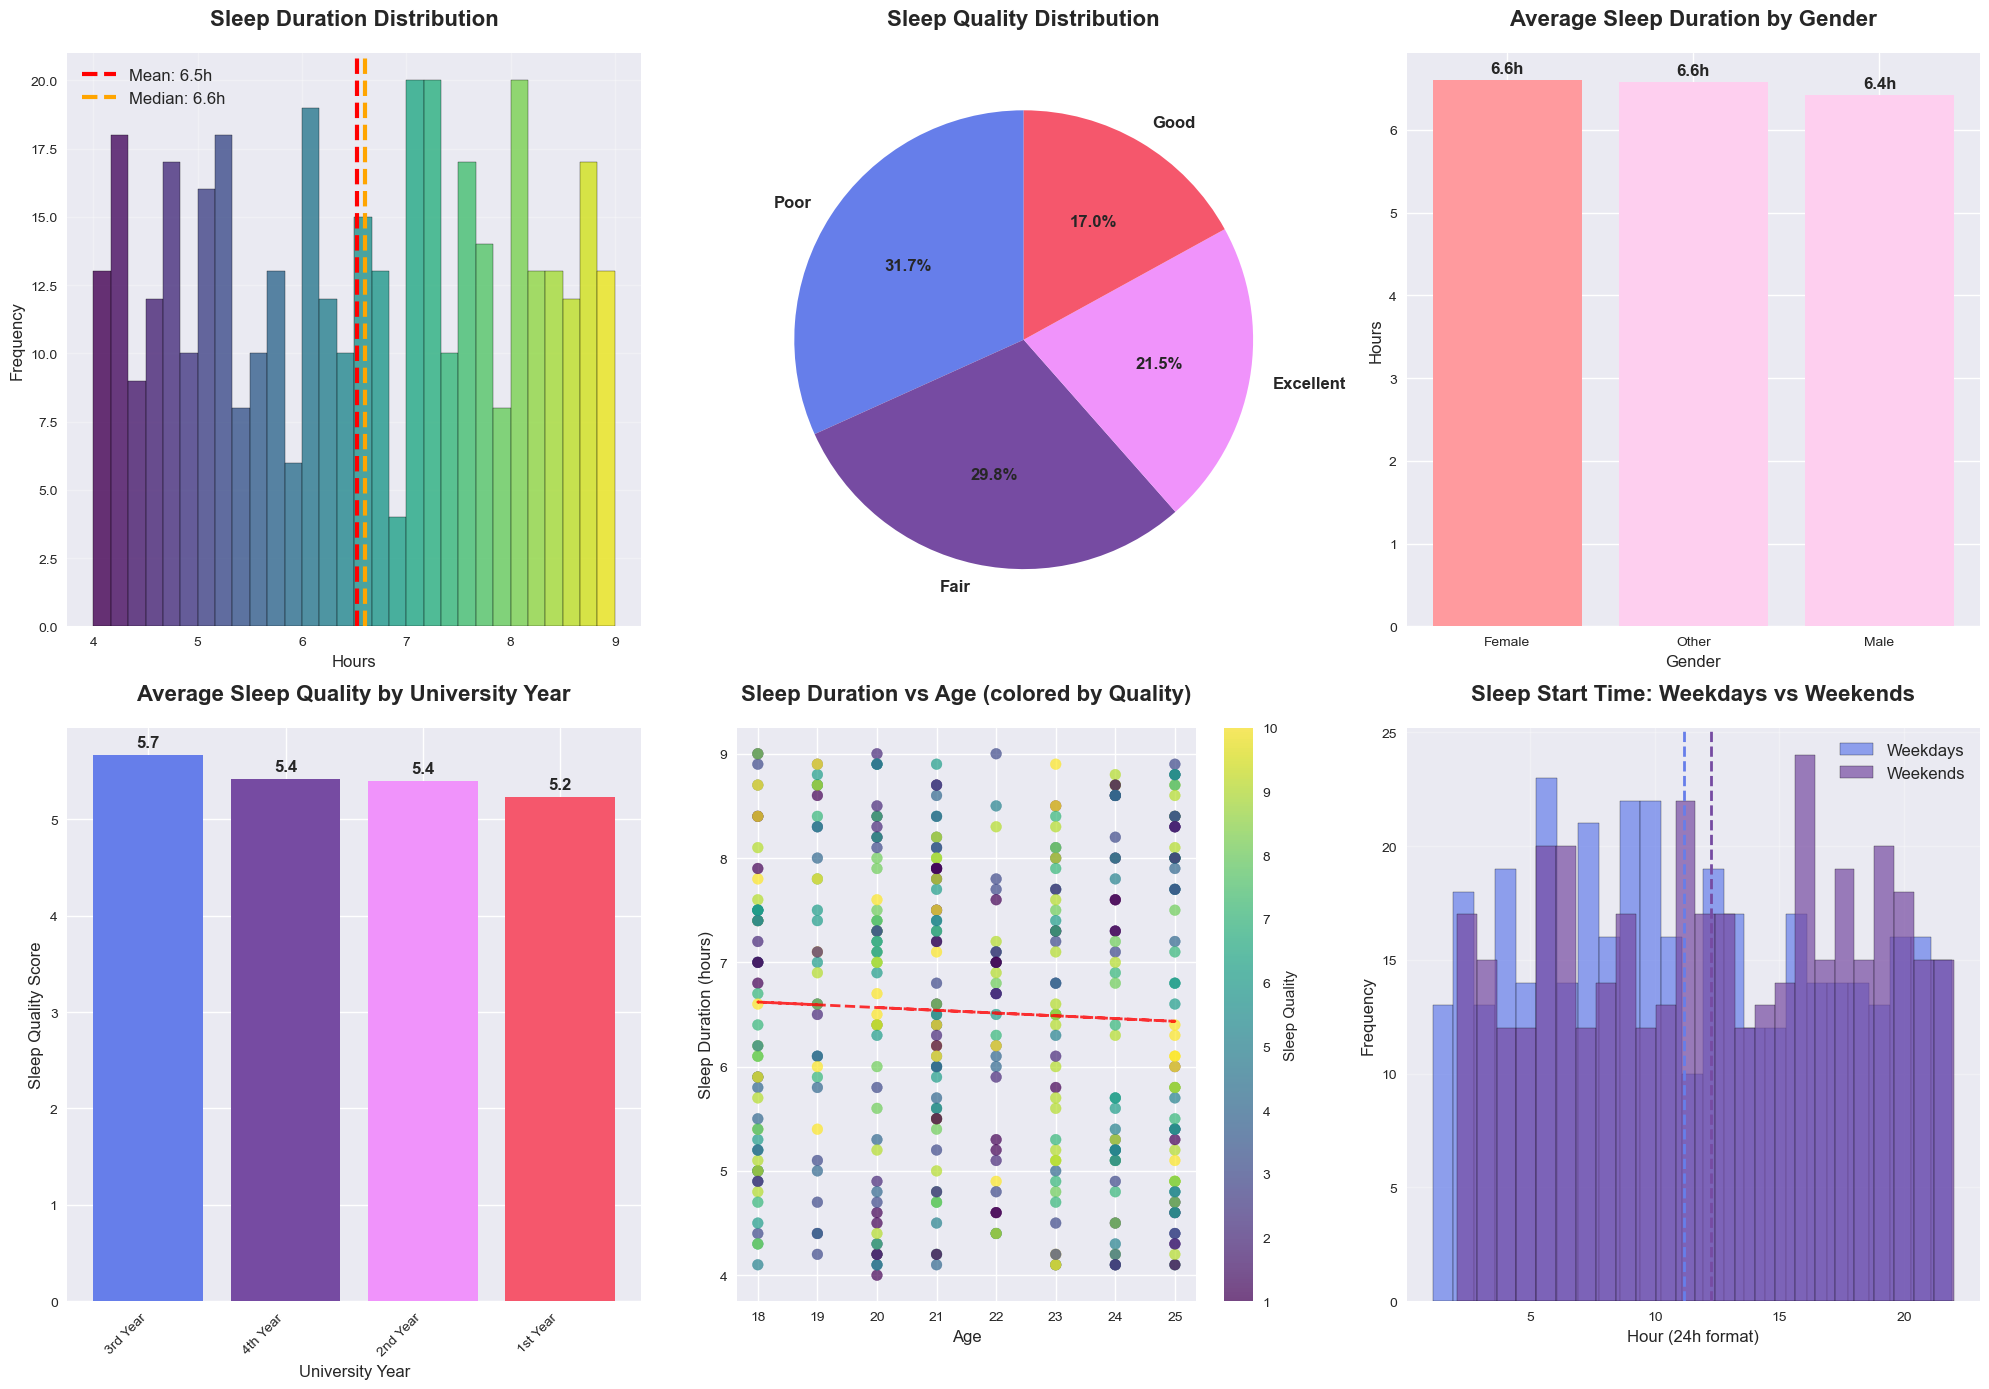

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Custom color palettes
colors_primary = ['#667eea', '#764ba2', '#f093fb', '#f5576c', '#4facfe', '#00f2fe']
colors_secondary = ['#ff9a9e', '#fecfef', '#fecfef', '#a8edea', '#fed6e3', '#d299c2']
colors_gradient = ['#667eea', '#764ba2', '#f093fb', '#f5576c', '#4facfe', '#00f2fe', '#ff9a9e', '#fecfef']

numeric_cols = train_data.select_dtypes(include=[np.number]).columns

#1 SLEEP BEHAVIOR ANALYSIS

#Sleep Duration Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 14))


# Sleep Duration Distribution
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(train_data['Sleep_Duration'], bins=30, color=colors_primary[0], alpha=0.8, edgecolor='black')
ax1.axvline(train_data['Sleep_Duration'].mean(), color='red', linestyle='--', linewidth=3,
            label=f'Mean: {train_data["Sleep_Duration"].mean():.1f}h')
ax1.axvline(train_data['Sleep_Duration'].median(), color='orange', linestyle='--', linewidth=3,
            label=f'Median: {train_data["Sleep_Duration"].median():.1f}h')
ax1.set_title('Sleep Duration Distribution', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Hours', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
# Color gradient for histogram
for i, patch in enumerate(patches):
    patch.set_facecolor(plt.cm.viridis(i / len(patches)))

# Sleep Quality Distribution
ax2 = axes[0, 1]
if 'Sleep_Quality_Category' in train_data.columns:
    quality_counts = train_data['Sleep_Quality_Category'].value_counts()
    wedges, texts, autotexts = ax2.pie(quality_counts.values, labels=quality_counts.index,
                                       autopct='%1.1f%%', colors=colors_primary, startangle=90,
                                       textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax2.set_title('Sleep Quality Distribution', fontsize=16, fontweight='bold', pad=20)
else:
    # If category doesn't exist, create it
    train_data['Sleep_Quality_Category'] = pd.cut(train_data['Sleep_Quality'],
                                        bins=[0, 5, 7, 8.5, 10],
                                        labels=['Poor', 'Fair', 'Good', 'Excellent'])
    quality_counts = train_data['Sleep_Quality_Category'].value_counts()
    wedges, texts, autotexts = ax2.pie(quality_counts.values, labels=quality_counts.index,
                                       autopct='%1.1f%%', colors=colors_primary, startangle=90,
                                       textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax2.set_title('Sleep Quality Distribution', fontsize=16, fontweight='bold', pad=20)

# Sleep Duration by Gender
ax3 = axes[0, 2]
gender_sleep = train_data.groupby('Gender')['Sleep_Duration'].mean().sort_values(ascending=False)
bars = ax3.bar(gender_sleep.index, gender_sleep.values, color=colors_secondary[:len(gender_sleep)])
ax3.set_title('Average Sleep Duration by Gender', fontsize=16, fontweight='bold', pad=20)
ax3.set_ylabel('Hours', fontsize=12)
ax3.set_xlabel('Gender', fontsize=12)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height:.1f}h',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Sleep Quality by University Year
ax4 = axes[1, 0]
year_quality = train_data.groupby('University_Year')['Sleep_Quality'].mean().sort_values(ascending=False)
bars = ax4.bar(year_quality.index, year_quality.values, color=colors_gradient[:len(year_quality)])
ax4.set_title('Average Sleep Quality by University Year', fontsize=16, fontweight='bold', pad=20)
ax4.set_ylabel('Sleep Quality Score', fontsize=12)
ax4.set_xlabel('University Year', fontsize=12)
ax4.set_xticklabels(year_quality.index, rotation=45, ha='right')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Sleep Duration vs Age
ax5 = axes[1, 1]
scatter = ax5.scatter(train_data['Age'], train_data['Sleep_Duration'],
                     c=train_data['Sleep_Quality'], cmap='viridis', alpha=0.7, s=60)
ax5.set_title('Sleep Duration vs Age (colored by Quality)', fontsize=16, fontweight='bold', pad=20)
ax5.set_xlabel('Age', fontsize=12)
ax5.set_ylabel('Sleep Duration (hours)', fontsize=12)
plt.colorbar(scatter, ax=ax5, label='Sleep Quality')
# Add trend line
z = np.polyfit(train_data['Age'], train_data['Sleep_Duration'], 1)
p = np.poly1d(z)
ax5.plot(train_data['Age'], p(train_data['Age']), "r--", alpha=0.8, linewidth=2)

# Weekend vs Weekday Sleep Pattern
ax6 = axes[1, 2]
weekday_sleep = train_data['Weekday_Sleep_Start'].dropna()
weekend_sleep = train_data['Weekend_Sleep_Start'].dropna()

ax6.hist(weekday_sleep, bins=25, alpha=0.7, label='Weekdays', color=colors_primary[0], edgecolor='black')
ax6.hist(weekend_sleep, bins=25, alpha=0.7, label='Weekends', color=colors_primary[1], edgecolor='black')
ax6.axvline(weekday_sleep.mean(), color=colors_primary[0], linestyle='--', linewidth=2)
ax6.axvline(weekend_sleep.mean(), color=colors_primary[1], linestyle='--', linewidth=2)
ax6.set_title('Sleep Start Time: Weekdays vs Weekends', fontsize=16, fontweight='bold', pad=20)
ax6.set_xlabel('Hour (24h format)', fontsize=12)
ax6.set_ylabel('Frequency', fontsize=12)
ax6.legend(fontsize=12)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

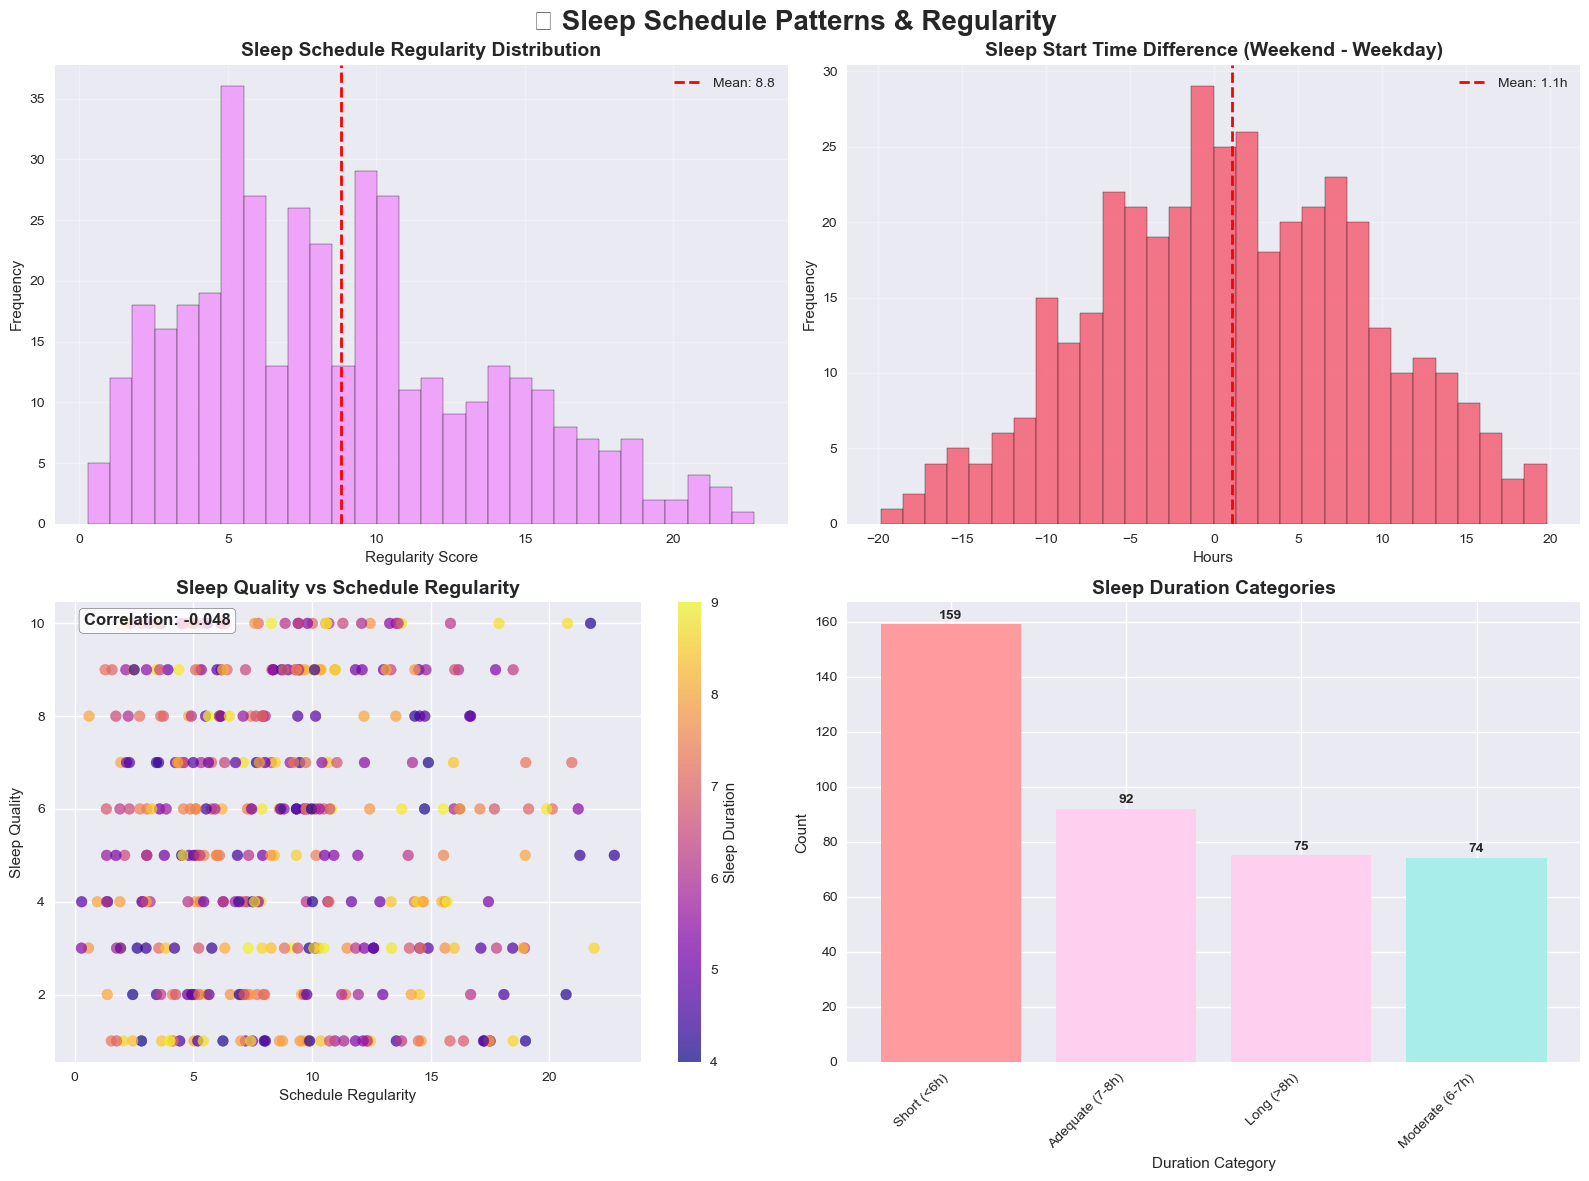

In [4]:
#Sleep Schedule Regularity Analysis

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🕐 Sleep Schedule Patterns & Regularity', fontsize=20, fontweight='bold', y=0.98)

# Schedule Regularity Distribution
ax1 = axes[0, 0]
train_data['Sleep_Schedule_Regularity'].hist(bins=30, ax=ax1, color=colors_primary[2], alpha=0.8, edgecolor='black')
ax1.axvline(train_data['Sleep_Schedule_Regularity'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {train_data["Sleep_Schedule_Regularity"].mean():.1f}')
ax1.set_title('Sleep Schedule Regularity Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Regularity Score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sleep Start Difference (Weekend - Weekday)
ax2 = axes[0, 1]
if 'Sleep_Start_Difference' in train_data.columns:
    train_data['Sleep_Start_Difference'].hist(bins=30, ax=ax2, color=colors_primary[3], alpha=0.8, edgecolor='black')
    ax2.axvline(train_data['Sleep_Start_Difference'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {train_data["Sleep_Start_Difference"].mean():.1f}h')
    ax2.set_title('Sleep Start Time Difference (Weekend - Weekday)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Hours')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# Sleep Quality vs Schedule Regularity
ax3 = axes[1, 0]
scatter = ax3.scatter(train_data['Sleep_Schedule_Regularity'], train_data['Sleep_Quality'],
                     c=train_data['Sleep_Duration'], cmap='plasma', alpha=0.7, s=60)
ax3.set_title('Sleep Quality vs Schedule Regularity', fontsize=14, fontweight='bold')
ax3.set_xlabel('Schedule Regularity')
ax3.set_ylabel('Sleep Quality')
plt.colorbar(scatter, ax=ax3, label='Sleep Duration')
# Add correlation coefficient
corr_coef = train_data['Sleep_Schedule_Regularity'].corr(train_data['Sleep_Quality'])
ax3.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=ax3.transAxes,
         fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Sleep Duration Category Distribution
ax4 = axes[1, 1]
if 'Sleep_Duration_Category' in train_data.columns:
    duration_counts = train_data['Sleep_Duration_Category'].value_counts()
    bars = ax4.bar(duration_counts.index, duration_counts.values, color=colors_secondary)
    ax4.set_title('Sleep Duration Categories', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Count')
    ax4.set_xlabel('Duration Category')
    ax4.set_xticklabels(duration_counts.index, rotation=45, ha='right')
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1, f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


🏃 PART 2: LIFESTYLE FACTORS ANALYSIS


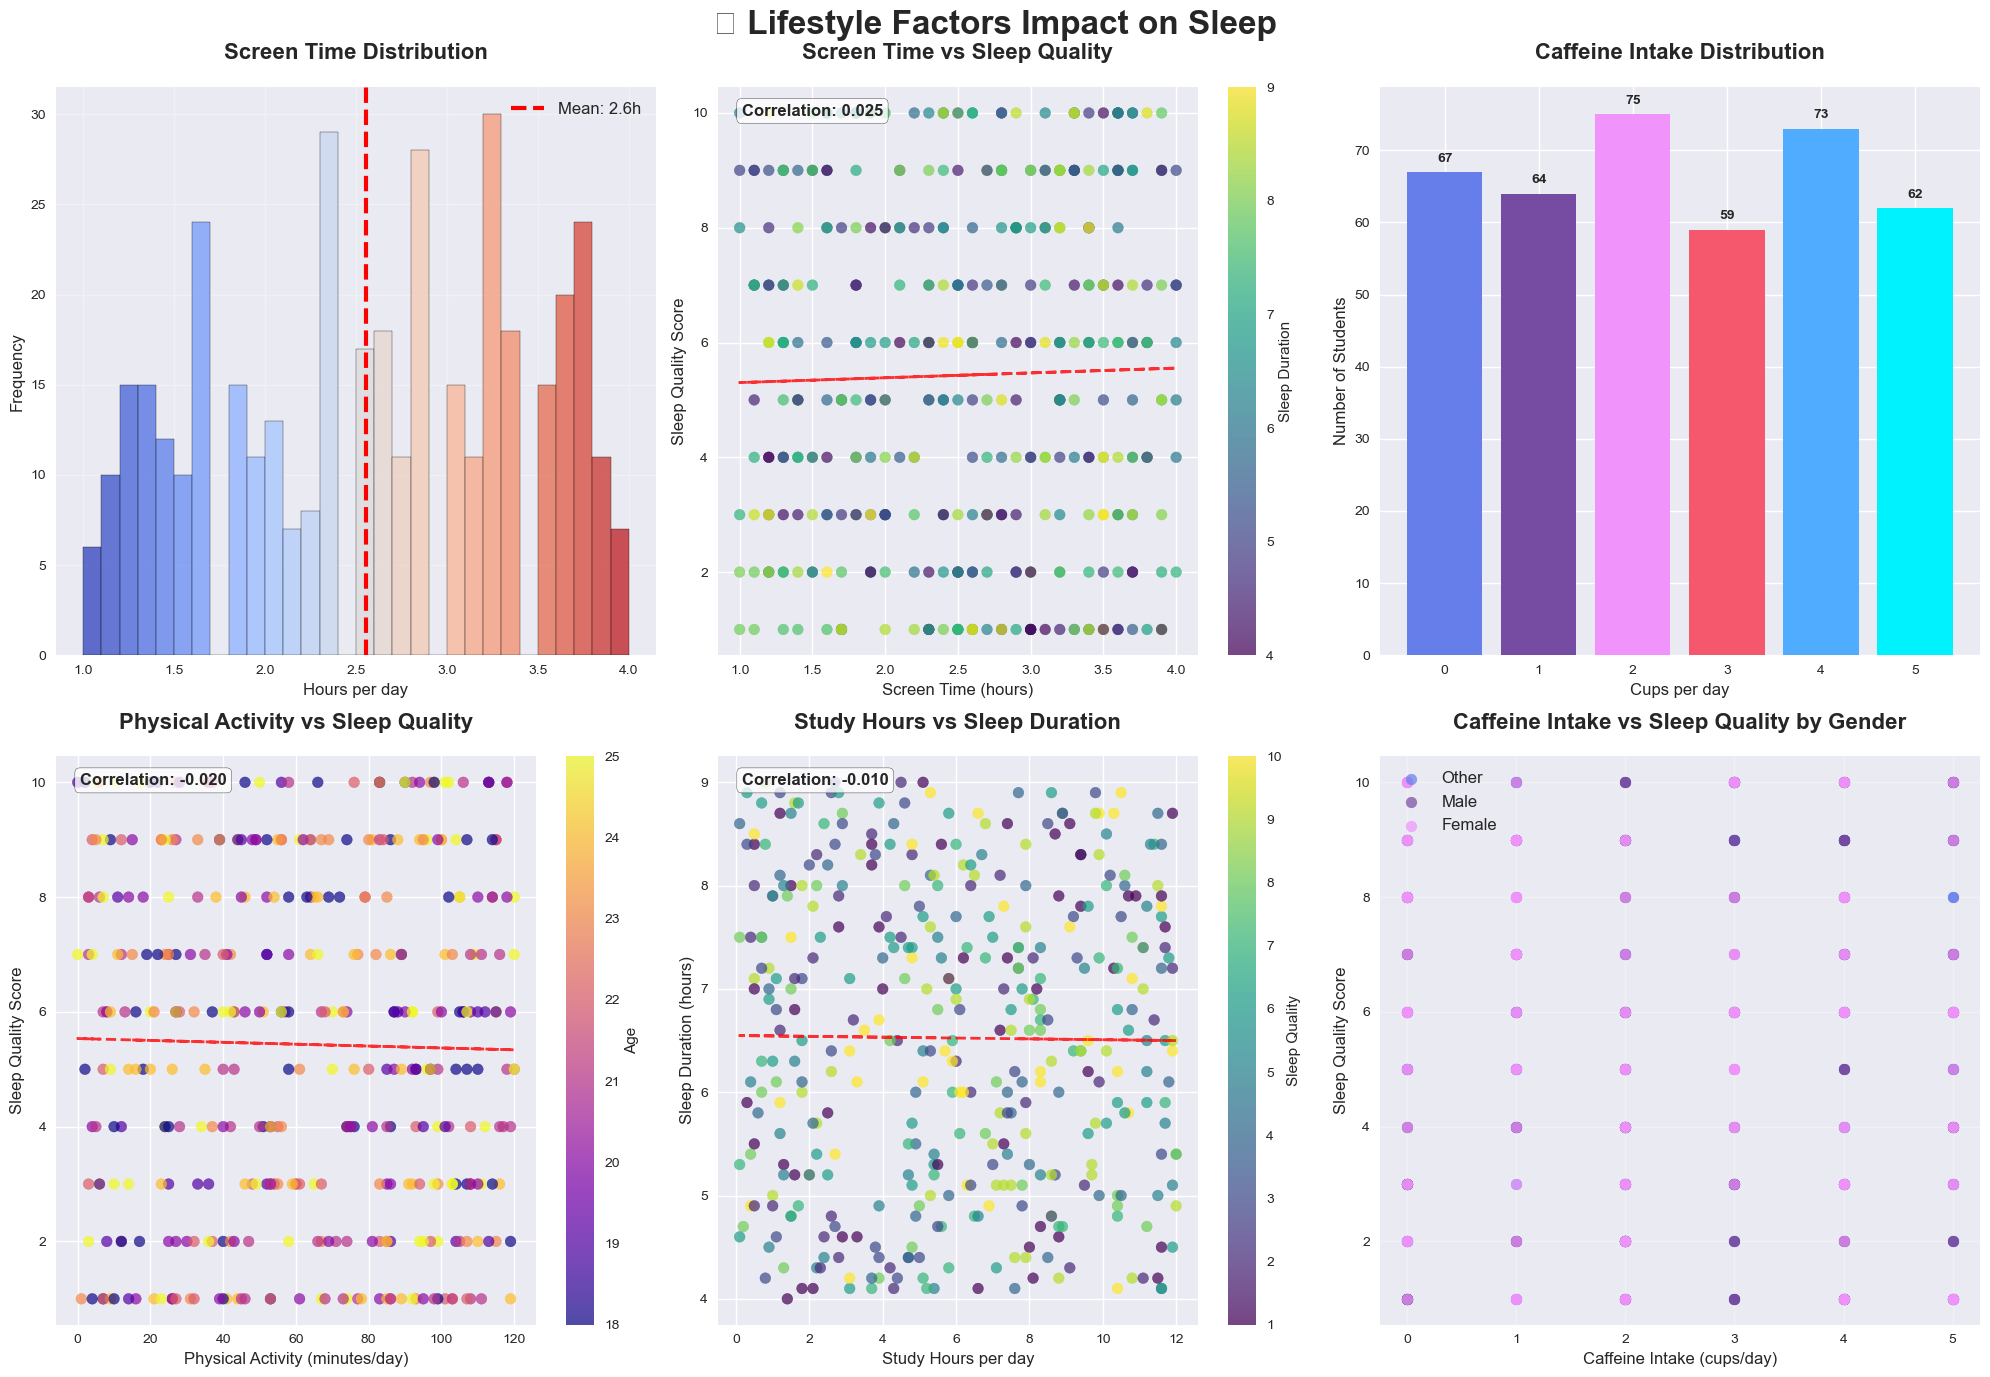


📊 CORRELATION ANALYSIS
------------------------------


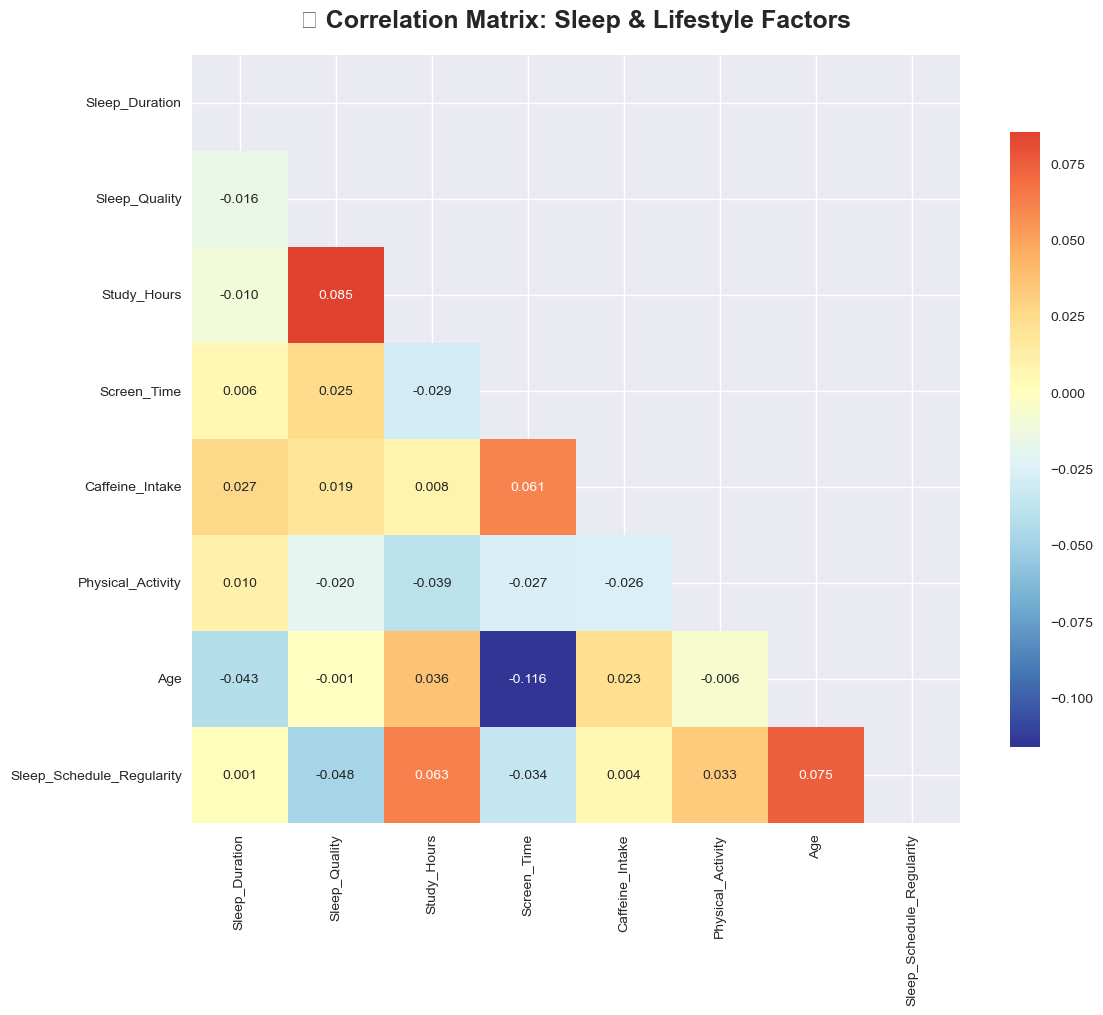


🔍 KEY CORRELATIONS:
--------------------


In [5]:
#2 LIFESTYLE FACTORS ANALYSIS

print("\n🏃 PART 2: LIFESTYLE FACTORS ANALYSIS")
print("=" * 50)

# Screen Time Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('📱 Lifestyle Factors Impact on Sleep', fontsize=24, fontweight='bold', y=0.98)

# Screen Time Distribution
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(train_data['Screen_Time'], bins=30, color=colors_primary[4], alpha=0.8, edgecolor='black')
ax1.axvline(train_data['Screen_Time'].mean(), color='red', linestyle='--', linewidth=3,
            label=f'Mean: {train_data["Screen_Time"].mean():.1f}h')
ax1.set_title('Screen Time Distribution', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Hours per day', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
# Color gradient for histogram
for i, patch in enumerate(patches):
    patch.set_facecolor(plt.cm.coolwarm(i / len(patches)))

# Screen Time vs Sleep Quality
ax2 = axes[0, 1]
scatter = ax2.scatter(train_data['Screen_Time'], train_data['Sleep_Quality'],
                     c=train_data['Sleep_Duration'], cmap='viridis', alpha=0.7, s=60)
ax2.set_title('Screen Time vs Sleep Quality', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Screen Time (hours)', fontsize=12)
ax2.set_ylabel('Sleep Quality Score', fontsize=12)
plt.colorbar(scatter, ax=ax2, label='Sleep Duration')
# Add trend line
z = np.polyfit(train_data['Screen_Time'].dropna(), train_data['Sleep_Quality'].dropna(), 1)
p = np.poly1d(z)
ax2.plot(train_data['Screen_Time'].dropna(), p(train_data['Screen_Time'].dropna()), "r--", alpha=0.8, linewidth=2)
# Add correlation
corr_coef = train_data['Screen_Time'].corr(train_data['Sleep_Quality'])
ax2.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=ax2.transAxes,
         fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Caffeine Intake Analysis
ax3 = axes[0, 2]
caffeine_counts = train_data['Caffeine_Intake'].value_counts().sort_index()
bars = ax3.bar(caffeine_counts.index, caffeine_counts.values, color=colors_gradient[:len(caffeine_counts)])
ax3.set_title('Caffeine Intake Distribution', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Cups per day', fontsize=12)
ax3.set_ylabel('Number of Students', fontsize=12)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Physical Activity vs Sleep Quality
ax4 = axes[1, 0]
scatter = ax4.scatter(train_data['Physical_Activity'], train_data['Sleep_Quality'],
                     c=train_data['Age'], cmap='plasma', alpha=0.7, s=60)
ax4.set_title('Physical Activity vs Sleep Quality', fontsize=16, fontweight='bold', pad=20)
ax4.set_xlabel('Physical Activity (minutes/day)', fontsize=12)
ax4.set_ylabel('Sleep Quality Score', fontsize=12)
plt.colorbar(scatter, ax=ax4, label='Age')
# Add trend line
z = np.polyfit(train_data['Physical_Activity'].dropna(), train_data['Sleep_Quality'].dropna(), 1)
p = np.poly1d(z)
ax4.plot(train_data['Physical_Activity'].dropna(), p(train_data['Physical_Activity'].dropna()), "r--", alpha=0.8, linewidth=2)
# Add correlation
corr_coef = train_data['Physical_Activity'].corr(train_data['Sleep_Quality'])
ax4.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=ax4.transAxes,
         fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Study Hours vs Sleep Duration
ax5 = axes[1, 1]
scatter = ax5.scatter(train_data['Study_Hours'], train_data['Sleep_Duration'],
                     c=train_data['Sleep_Quality'], cmap='viridis', alpha=0.7, s=60)
ax5.set_title('Study Hours vs Sleep Duration', fontsize=16, fontweight='bold', pad=20)
ax5.set_xlabel('Study Hours per day', fontsize=12)
ax5.set_ylabel('Sleep Duration (hours)', fontsize=12)
plt.colorbar(scatter, ax=ax5, label='Sleep Quality')
# Add trend line
z = np.polyfit(train_data['Study_Hours'].dropna(), train_data['Sleep_Duration'].dropna(), 1)
p = np.poly1d(z)
ax5.plot(train_data['Study_Hours'].dropna(), p(train_data['Study_Hours'].dropna()), "r--", alpha=0.8, linewidth=2)
# Add correlation
corr_coef = train_data['Study_Hours'].corr(train_data['Sleep_Duration'])
ax5.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=ax5.transAxes,
         fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Caffeine vs Sleep Quality by Gender
ax6 = axes[1, 2]
for i, gender in enumerate(train_data['Gender'].unique()):
    gender_data = train_data[train_data['Gender'] == gender]
    ax6.scatter(gender_data['Caffeine_Intake'], gender_data['Sleep_Quality'],
               label=gender, alpha=0.7, s=60, color=colors_primary[i])
ax6.set_title('Caffeine Intake vs Sleep Quality by Gender', fontsize=16, fontweight='bold', pad=20)
ax6.set_xlabel('Caffeine Intake (cups/day)', fontsize=12)
ax6.set_ylabel('Sleep Quality Score', fontsize=12)
ax6.legend(fontsize=12)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation Matrix
print("\n📊 CORRELATION ANALYSIS")
print("-" * 30)

# Select key variables for correlation analysis
correlation_vars = ['Sleep_Duration', 'Sleep_Quality', 'Study_Hours', 'Screen_Time',
                   'Caffeine_Intake', 'Physical_Activity', 'Age', 'Sleep_Schedule_Regularity']
correlation_vars = [var for var in correlation_vars if var in train_data.columns]

correlation_matrix = train_data[correlation_vars].corr()

# Create a beautiful correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                     square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=ax)
ax.set_title('🔗 Correlation Matrix: Sleep & Lifestyle Factors', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation insights
print("\n🔍 KEY CORRELATIONS:")
print("-" * 20)
for i in range(len(correlation_vars)):
    for j in range(i+1, len(correlation_vars)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Only show strong correlations
            print(f"{correlation_vars[i]} ↔ {correlation_vars[j]}: {corr_val:.3f}")

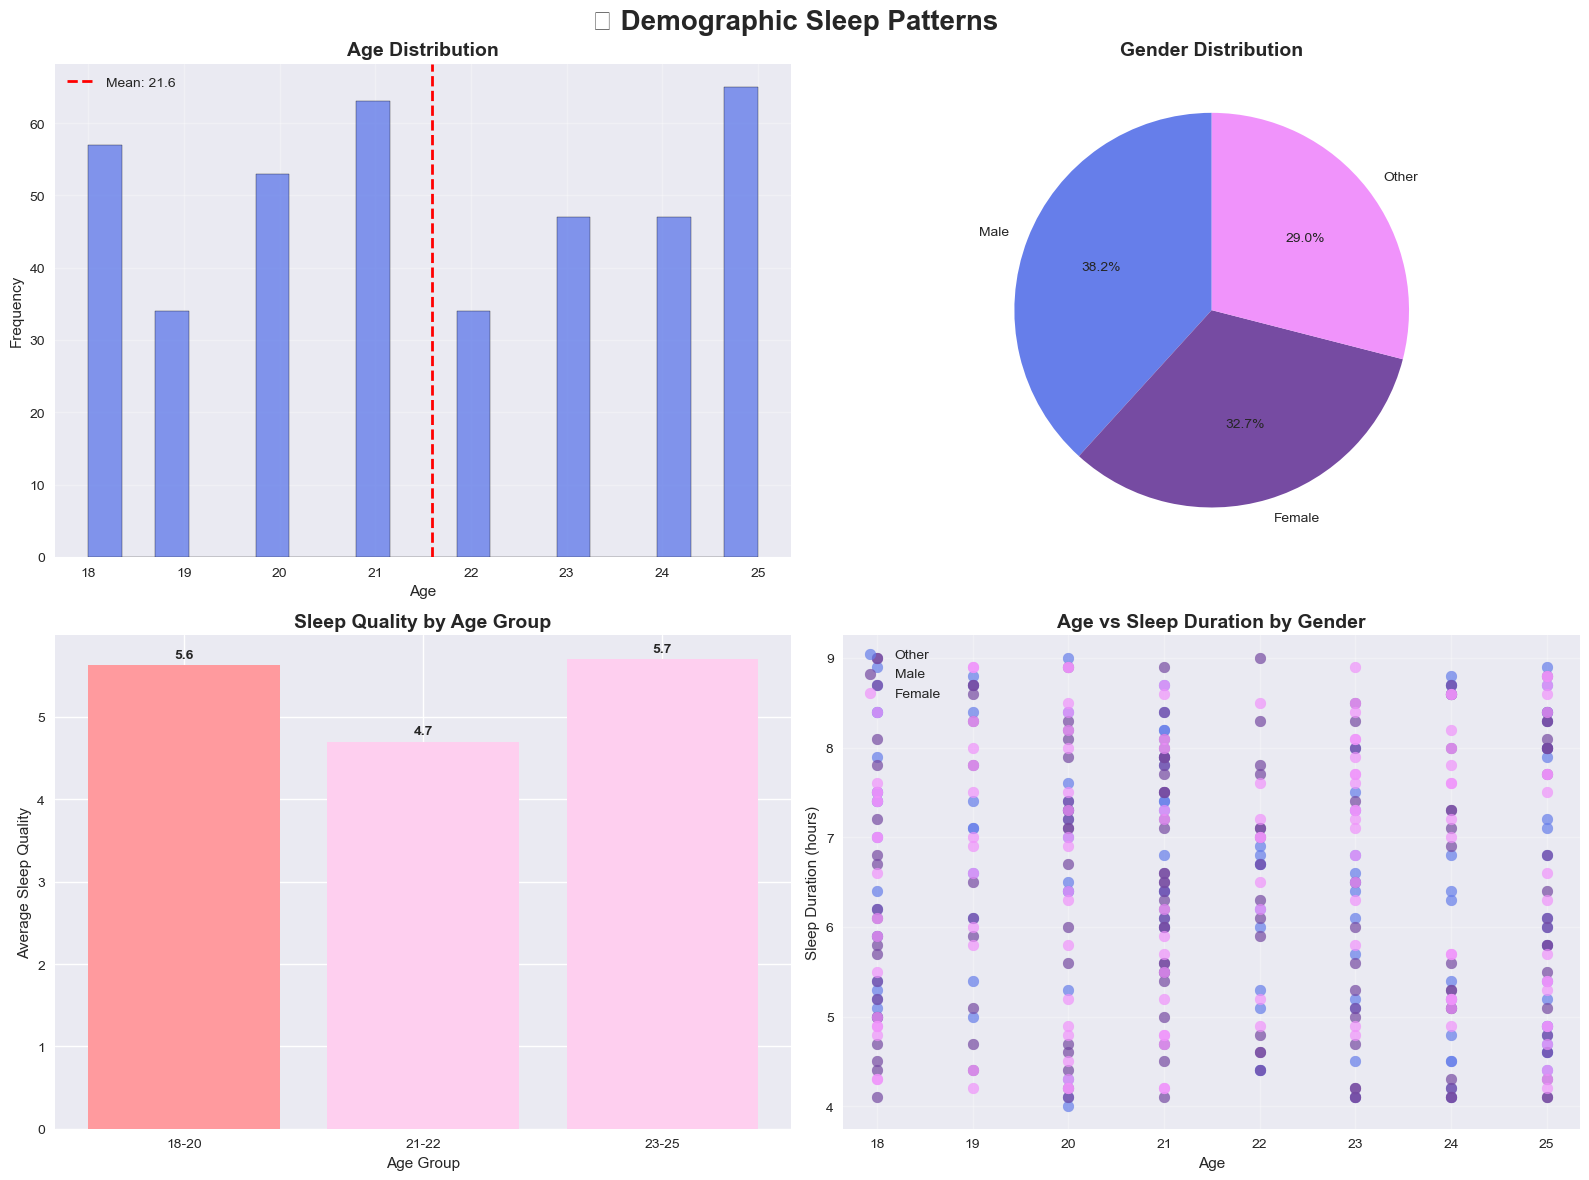

In [6]:
#3 DEMOGRAPHIC ANALYSIS

# Age and Gender Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('👥 Demographic Sleep Patterns', fontsize=20, fontweight='bold', y=0.98)

# Age Distribution
ax1 = axes[0, 0]
train_data['Age'].hist(bins=20, ax=ax1, color=colors_primary[0], alpha=0.8, edgecolor='black')
ax1.axvline(train_data['Age'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {train_data["Age"].mean():.1f}')
ax1.set_title('Age Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gender Distribution
ax2 = axes[0, 1]
gender_counts = train_data['Gender'].value_counts()
wedges, texts, autotexts = ax2.pie(gender_counts.values, labels=gender_counts.index,
                                   autopct='%1.1f%%', colors=colors_primary, startangle=90)
ax2.set_title('Gender Distribution', fontsize=14, fontweight='bold')

# Sleep Quality by Age Group
ax3 = axes[1, 0]
if 'Age_Group' in train_data.columns:
    age_sleep = train_data.groupby('Age_Group')['Sleep_Quality'].mean()
    bars = ax3.bar(age_sleep.index, age_sleep.values, color=colors_secondary)
    ax3.set_title('Sleep Quality by Age Group', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Average Sleep Quality')
    ax3.set_xlabel('Age Group')
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height:.1f}',
                 ha='center', va='bottom', fontweight='bold')

# Multi-dimensional analysis
ax4 = axes[1, 1]
for i, gender in enumerate(train_data['Gender'].unique()):
    gender_data = train_data[train_data['Gender'] == gender]
    ax4.scatter(gender_data['Age'], gender_data['Sleep_Duration'],
               label=gender, alpha=0.7, s=60, color=colors_primary[i])
ax4.set_title('Age vs Sleep Duration by Gender', fontsize=14, fontweight='bold')
ax4.set_xlabel('Age')
ax4.set_ylabel('Sleep Duration (hours)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Calculate key statistics
avg_sleep_duration = train_data['Sleep_Duration'].mean()
avg_sleep_quality = train_data['Sleep_Quality'].mean()
avg_study_hours = train_data['Study_Hours'].mean()
avg_screen_time = train_data['Screen_Time'].mean()
avg_physical_activity = train_data['Physical_Activity'].mean()

print(f" KEY METRICS:")
print(f"   • Average Sleep Duration: {avg_sleep_duration:.1f} hours")
print(f"   • Average Sleep Quality: {avg_sleep_quality:.1f}/10")
print(f"   • Average Study Hours: {avg_study_hours:.1f} hours/day")
print(f"   • Average Screen Time: {avg_screen_time:.1f} hours/day")
print(f"   • Average Physical Activity: {avg_physical_activity:.1f} minutes/day")

# Gender comparisons
print(f"\n GENDER COMPARISONS:")
for gender in train_data['Gender'].unique():
    gender_data = train_data[train_data['Gender'] == gender]
    print(f"   {gender}:")
    print(f"     - Sleep Duration: {gender_data['Sleep_Duration'].mean():.1f}h")
    print(f"     - Sleep Quality: {gender_data['Sleep_Quality'].mean():.1f}/10")
    print(f"     - Study Hours: {gender_data['Study_Hours'].mean():.1f}h")

# University Year comparisons
print(f"\n UNIVERSITY YEAR COMPARISONS:")
for year in sorted(train_data['University_Year'].unique()):
    year_data = train_data[train_data['University_Year'] == year]
    print(f"   {year}:")
    print(f"     - Sleep Duration: {year_data['Sleep_Duration'].mean():.1f}h")
    print(f"     - Sleep Quality: {year_data['Sleep_Quality'].mean():.1f}/10")
    print(f"     - Study Hours: {year_data['Study_Hours'].mean():.1f}h")

 KEY METRICS:
   • Average Sleep Duration: 6.5 hours
   • Average Sleep Quality: 5.4/10
   • Average Study Hours: 6.0 hours/day
   • Average Screen Time: 2.6 hours/day
   • Average Physical Activity: 62.6 minutes/day

 GENDER COMPARISONS:
   Other:
     - Sleep Duration: 6.6h
     - Sleep Quality: 5.6/10
     - Study Hours: 6.3h
   Male:
     - Sleep Duration: 6.4h
     - Sleep Quality: 5.3/10
     - Study Hours: 6.3h
   Female:
     - Sleep Duration: 6.6h
     - Sleep Quality: 5.5/10
     - Study Hours: 5.4h

 UNIVERSITY YEAR COMPARISONS:
   1st Year:
     - Sleep Duration: 6.6h
     - Sleep Quality: 5.2/10
     - Study Hours: 5.8h
   2nd Year:
     - Sleep Duration: 6.6h
     - Sleep Quality: 5.4/10
     - Study Hours: 5.9h
   3rd Year:
     - Sleep Duration: 6.5h
     - Sleep Quality: 5.7/10
     - Study Hours: 6.4h
   4th Year:
     - Sleep Duration: 6.4h
     - Sleep Quality: 5.4/10
     - Study Hours: 5.8h


#### FAMD


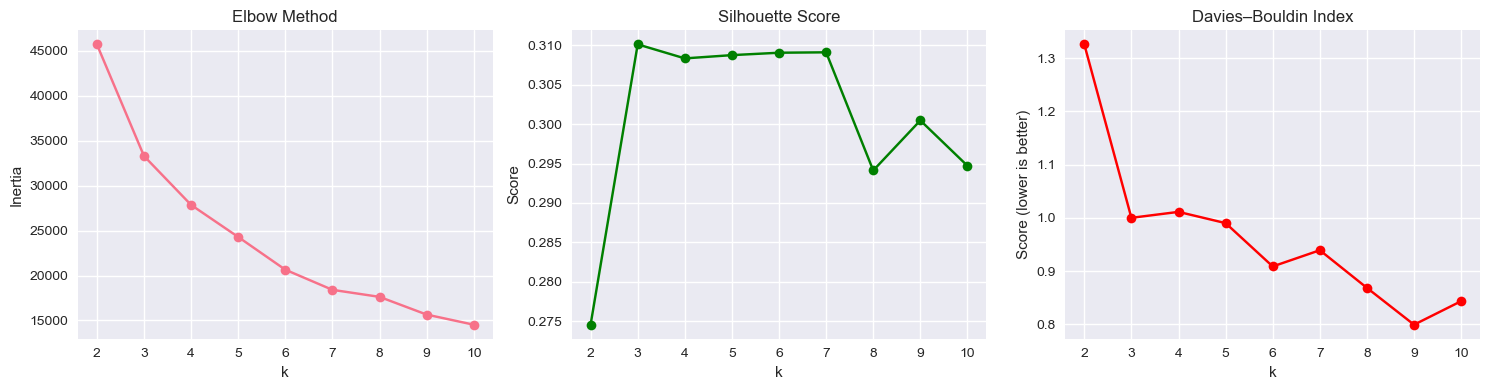

In [9]:
import prince

famd = prince.FAMD(n_components=2, random_state=42)
famd_data = famd.fit_transform(train_data)  


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
db_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(famd_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(famd_data, preds))
    db_scores.append(davies_bouldin_score(famd_data, preds))


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(K, inertias, 'o-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(K, silhouettes, 'o-', color='green')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(K, db_scores, 'o-', color='red')
plt.title('Davies–Bouldin Index')
plt.xlabel('k')
plt.ylabel('Score (lower is better)')

plt.tight_layout()
plt.savefig("silhoutte") 
plt.show()

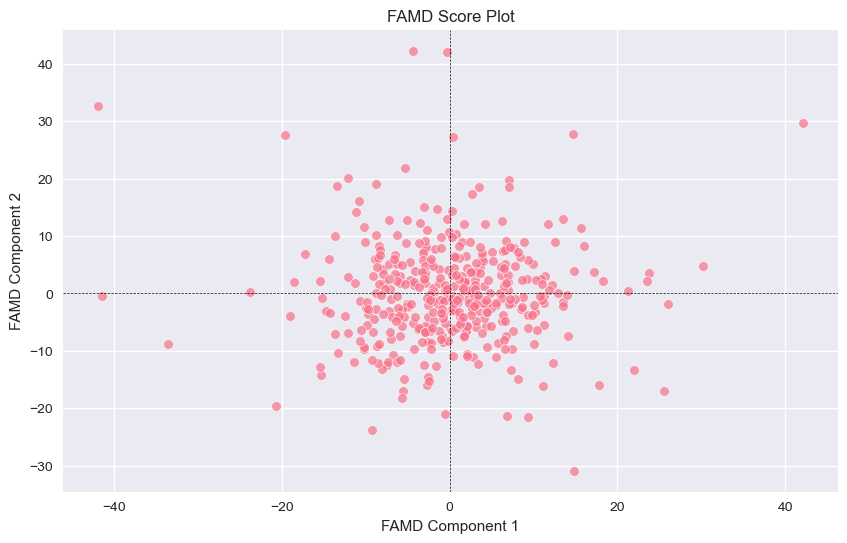

In [62]:
famd_scores = famd.transform(train_data)

# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=famd_scores.iloc[:, 0], y=famd_scores.iloc[:, 1], alpha=0.7)
#sns.scatterplot(x=famd_scores[0], y=famd_scores[1], alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.savefig("famd") 
plt.show()

Cluster Sizes:
Cluster
0    111
1     73
2     53
3      8
4     43
5      5
6      1
7     30
8     76
Name: count, dtype: int64


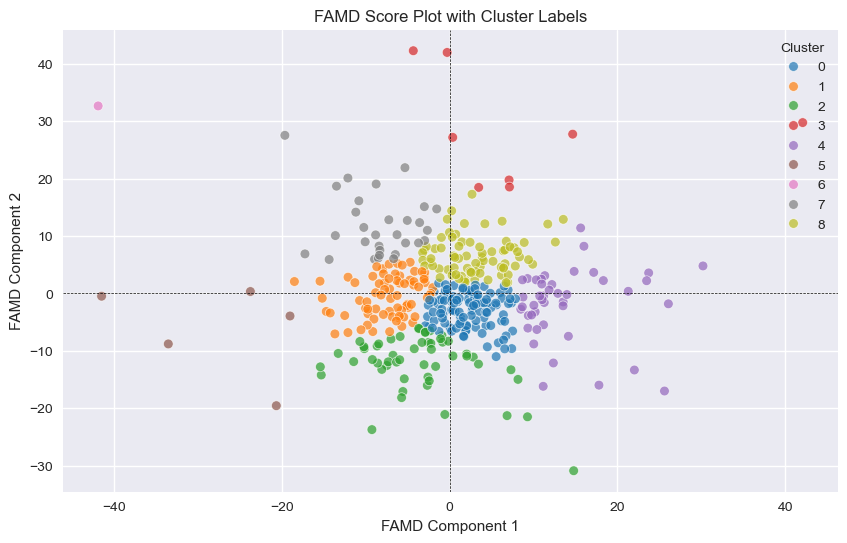

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Apply KMeans clustering
kmeans = KMeans(n_clusters=9, random_state=42)  # change 3 to your optimal k
cluster_labels = kmeans.fit_predict(famd_scores)

# 2. Add cluster labels to the FAMD scores
famd_scores_with_clusters = famd_scores.copy()
famd_scores_with_clusters['Cluster'] = cluster_labels

# 3. Print cluster sizes
cluster_sizes = famd_scores_with_clusters['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

# 4. Plot FAMD with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=famd_scores_with_clusters.iloc[:, 0],
    y=famd_scores_with_clusters.iloc[:, 1],
    hue=famd_scores_with_clusters['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot with Cluster Labels")
plt.legend(title="Cluster")
plt.savefig("FAMD by cluster") 
plt.show()

#### 1. Count plot for Screen Time Category vs Sleep Quality Category

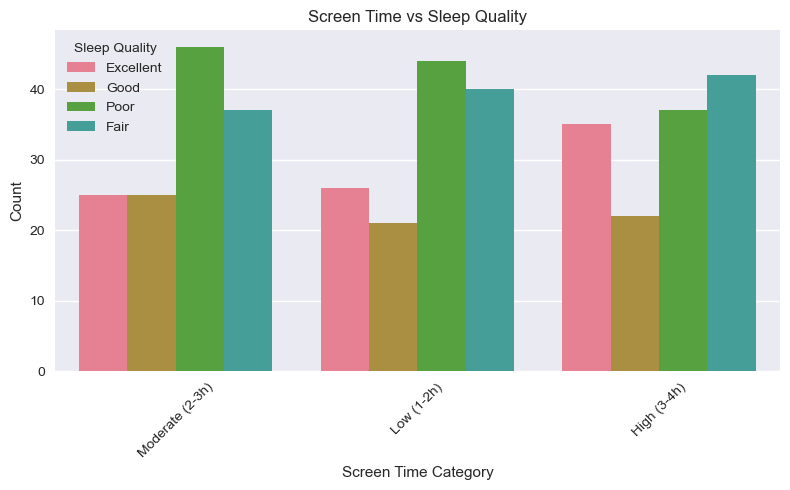

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x='Screen_Time_Category', hue='Sleep_Quality_Category')
plt.title('Screen Time vs Sleep Quality')
plt.xlabel('Screen Time Category')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("1") 
plt.show()


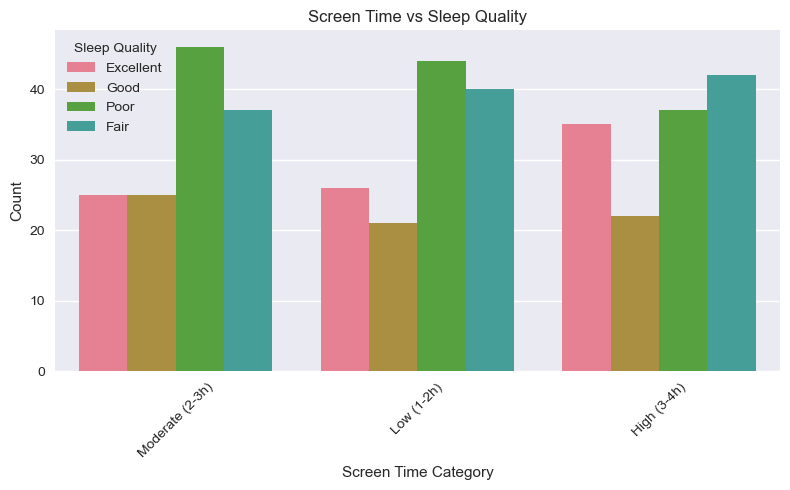

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x='Screen_Time_Category', hue='Sleep_Quality_Category')
plt.title('Screen Time vs Sleep Quality')
plt.xlabel('Screen Time Category')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("1") 
plt.show()

#### 2. Age Group vs Sleep Duration Category

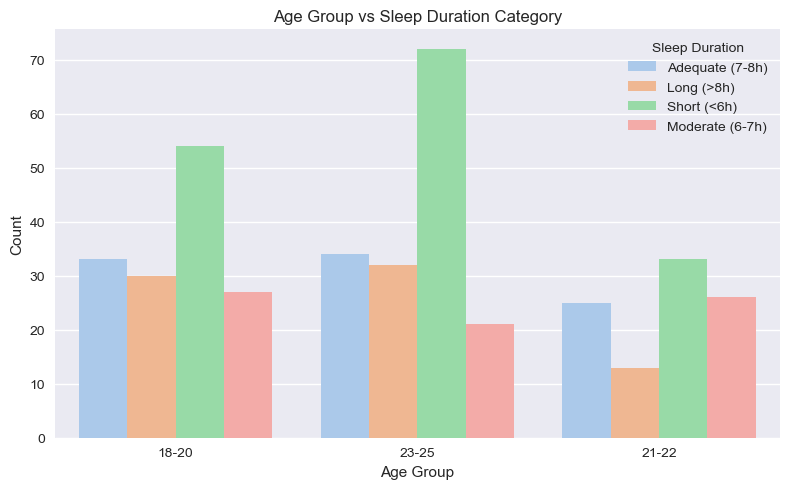

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="Age_Group", hue="Sleep_Duration_Category", palette="pastel")
plt.title("Age Group vs Sleep Duration Category")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Sleep Duration")
plt.tight_layout()

plt.savefig("2")  
plt.show()


#### 3. Study Intensity vs Sleep Quality Category

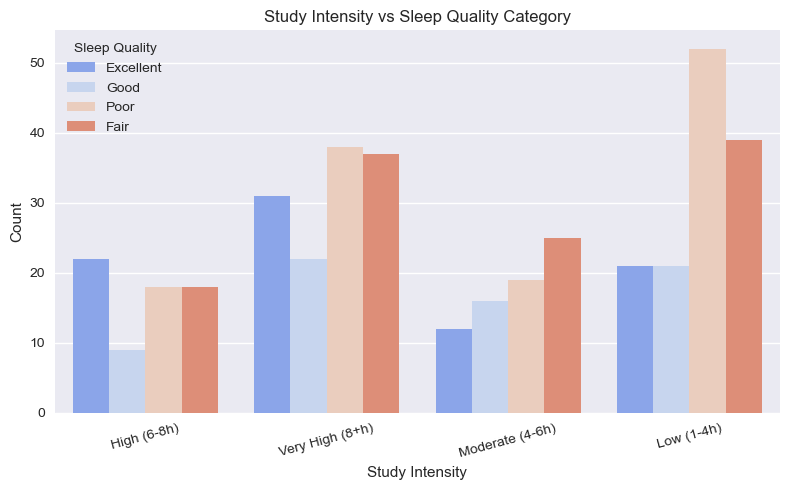

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="Study_Intensity", hue="Sleep_Quality_Category", palette="coolwarm", dodge=True)
plt.title("Study Intensity vs Sleep Quality Category")
plt.xlabel("Study Intensity")
plt.ylabel("Count")
plt.legend(title="Sleep Quality")
plt.xticks(rotation=15)
plt.tight_layout()

plt.savefig("3") 
plt.show()

#### 4. Screen Time Category vs Sleep Duration Categor

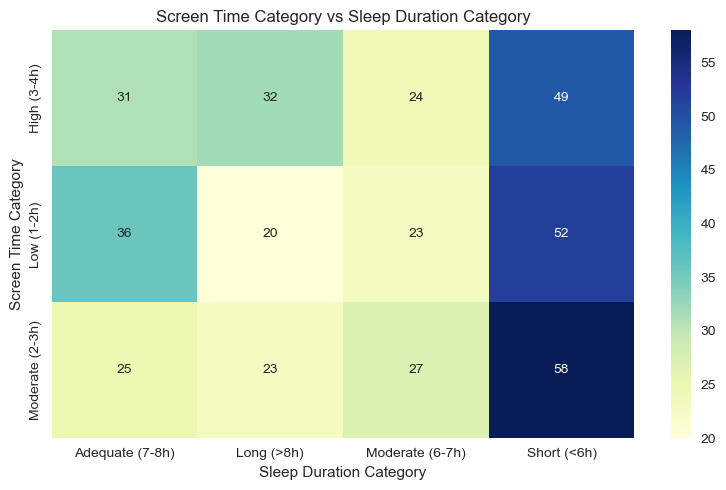

In [20]:
import pandas as pd

# Create crosstab
ct = pd.crosstab(train_data["Screen_Time_Category"], train_data["Sleep_Duration_Category"])

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Screen Time Category vs Sleep Duration Category")
plt.xlabel("Sleep Duration Category")
plt.ylabel("Screen Time Category")
plt.tight_layout()

plt.savefig("4") 
plt.show()

#### 5. Grouped Bar Plot: Sleep Duration by Gender and University Year

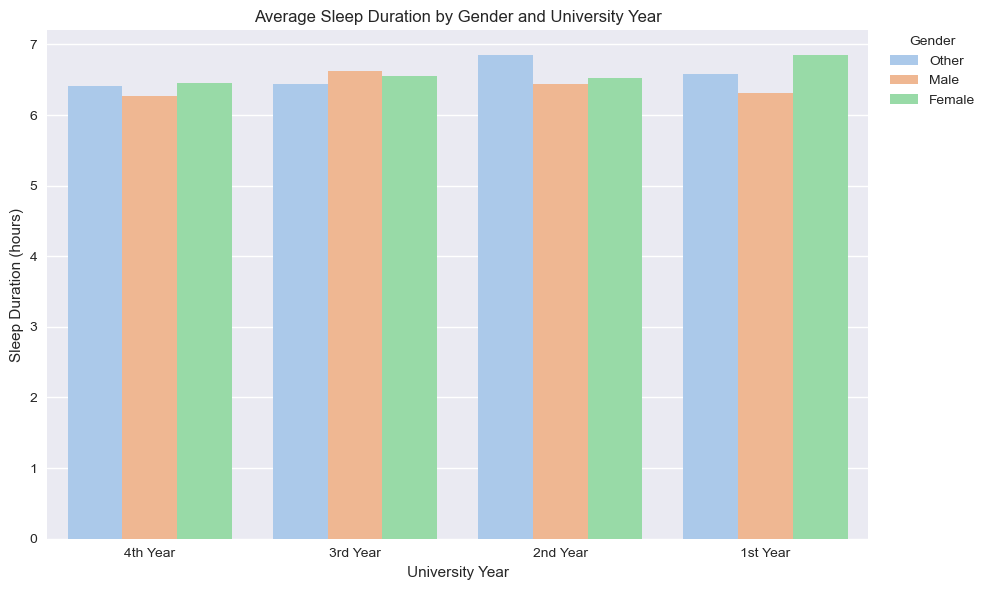

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x="University_Year", y="Sleep_Duration", hue="Gender", ci=None, palette="pastel")
plt.title("Average Sleep Duration by Gender and University Year")
plt.ylabel("Sleep Duration (hours)")
plt.xlabel("University Year")
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()

plt.savefig("5") 
plt.show()


 #### 6. Sleep Quality by Gender and Age Group

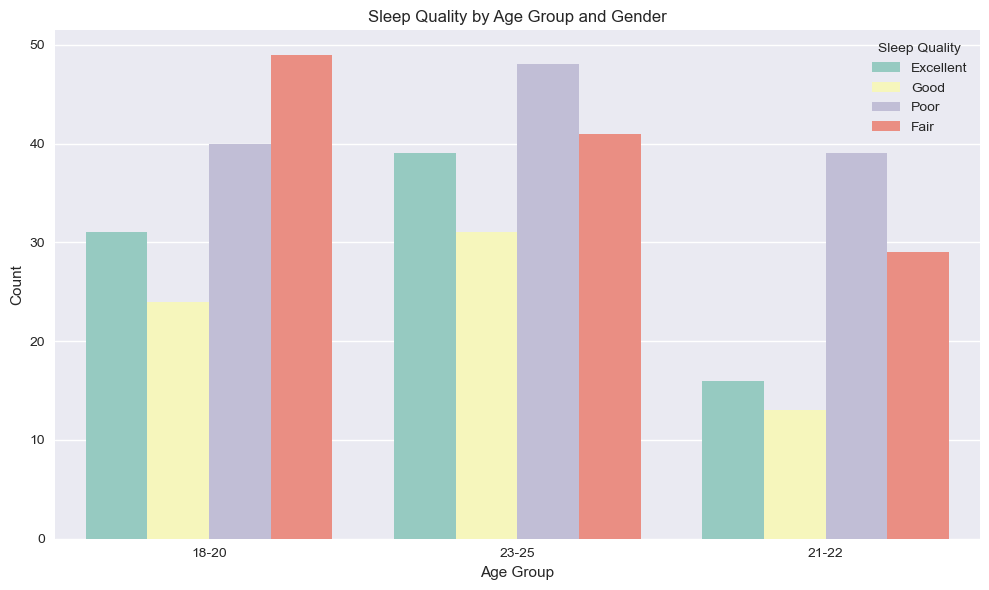

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="Age_Group", hue="Sleep_Quality_Category", palette="Set3")
plt.title("Sleep Quality by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Sleep Quality")
plt.tight_layout()

plt.savefig("6") 
plt.show()

#### 7. Physical Activity by Gender and University Year

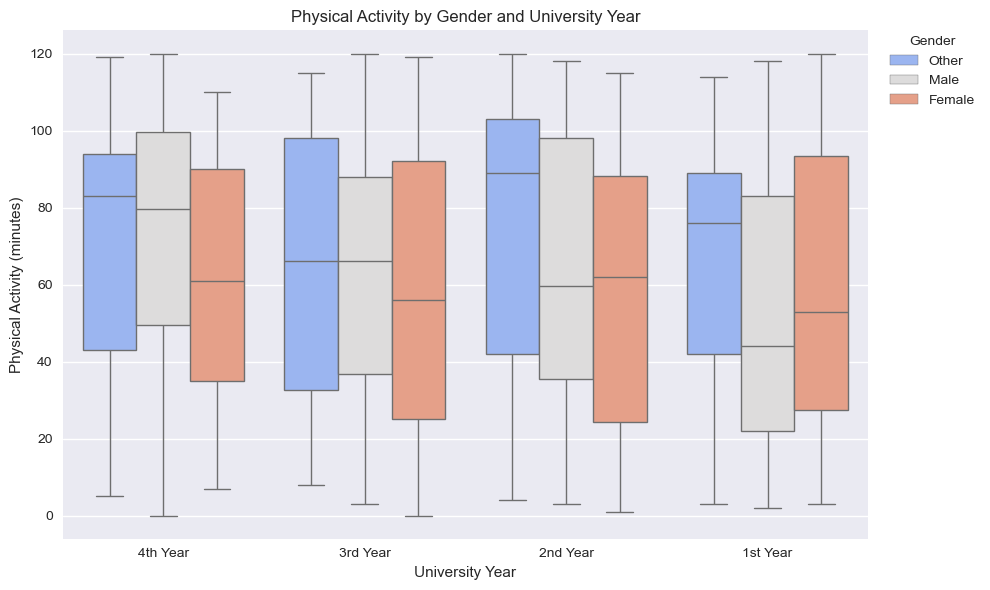

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x="University_Year", y="Physical_Activity", hue="Gender", palette="coolwarm")
plt.title("Physical Activity by Gender and University Year")
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.ylabel("Physical Activity (minutes)")
plt.xlabel("University Year")
plt.tight_layout()

plt.savefig("7") 
plt.show()

#### 8. Study Hours by Gender and University Year

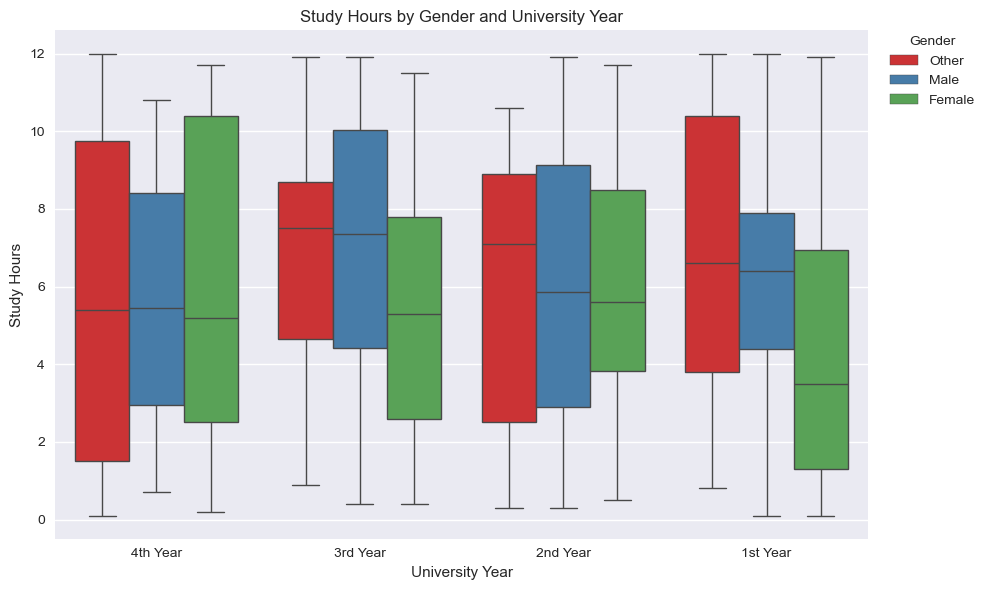

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x="University_Year", y="Study_Hours", hue="Gender", palette="Set1")
plt.title("Study Hours by Gender and University Year")
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.ylabel("Study Hours")
plt.xlabel("University Year")
plt.tight_layout()

plt.savefig("8") 
plt.show()

#### 9. Physical Activity by Gender and University Year


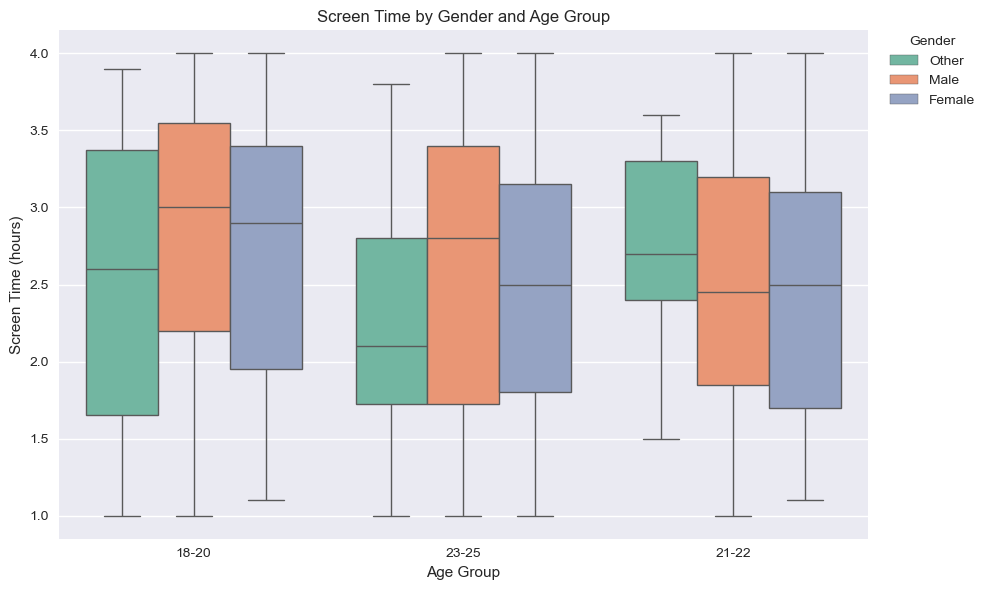

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x="Age_Group", y="Screen_Time", hue="Gender", palette="Set2")
plt.title("Screen Time by Gender and Age Group")
plt.ylabel("Screen Time (hours)")
plt.xlabel("Age Group")
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.tight_layout()

plt.savefig("9") 
plt.show()

####  10. Caffeine Intake by Gender and University Year

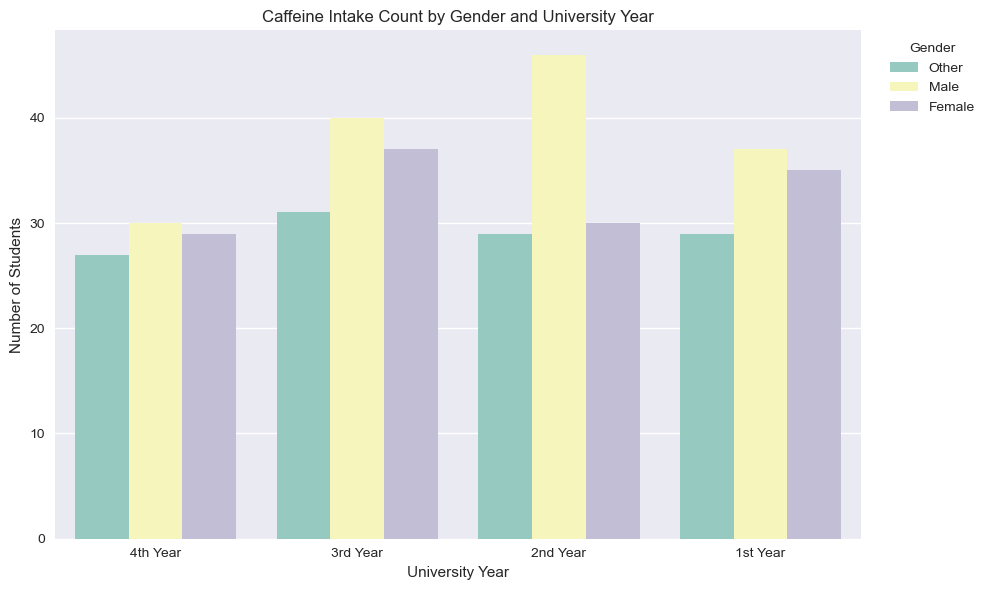

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="University_Year", hue="Gender", palette="Set3")
plt.title("Caffeine Intake Count by Gender and University Year")
plt.xlabel("University Year")
plt.ylabel("Number of Students")
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

plt.savefig("10") 
plt.show()


In [33]:
data.head

<bound method NDFrame.head of             Age  Gender University_Year  Sleep_Duration  Study_Hours  \
Student_ID                                                             
1            24   Other        2nd Year             7.7          7.9   
2            21    Male        1st Year             6.3          6.0   
3            22    Male        4th Year             5.1          6.7   
4            24   Other        4th Year             6.3          8.6   
5            20    Male        4th Year             4.7          2.7   
...         ...     ...             ...             ...          ...   
496          24    Male        2nd Year             5.1          9.3   
497          20    Male        2nd Year             8.9          7.7   
498          21    Male        3rd Year             5.7          6.4   
499          18  Female        2nd Year             4.9          0.5   
500          21    Male        3rd Year             7.9         11.6   

            Screen_Time  Caffeine